In [16]:
from radargram import Radargram
import matplotlib.pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [21]:
save = True # Save figure
raw = False # Use raw data or processed data
i_rg = 30 # Radargram number

# Load MAT file in v7.3 format using h5py
file_path = (
    "./../../data/raw/radargrams.mat"
    if raw
    else "./../../../GPR_Daten_mat/radargrams.mat"
)
x_path = "./../../data/raw/x.mat" if raw else "./../../../GPR_Daten_mat/x.mat"
t_path = "./../../data/raw/t.mat" if raw else "./../../../GPR_Daten_mat/t.mat"

# First, explore the structure of the file
with h5py.File(file_path, "r") as f:
    print("Top-level keys:", list(f.keys()))

    # Explore first level of structure
    for key in f.keys():
        if isinstance(f[key], h5py.Group):
            print(f"{key} (Group): {list(f[key].keys())}")
        else:
            print(f"{key} (Dataset): shape={f[key].shape}, dtype={f[key].dtype}")

    # Load data from the first available key
    first_key = list(f.keys())[0]  # second key

    if isinstance(f[first_key], h5py.Group):
        # If it's a group, look for a dataset inside
        nested_keys = list(f[first_key].keys())
        if nested_keys:
            data_path = f"{first_key}/{nested_keys[i_rg]}"
            print(f"Loading data from: {data_path}")
            data = np.array(
                f[data_path][:]
            ).T  # Transpose to match MATLAB's orientation
    else:
        # If it's directly a dataset
        data = np.array(f[first_key][:]).T
        print(f"Loading data from: {first_key}")

    # Print data shape
    print(f"Data shape: {data.shape}")

# First, explore the structure of the file
with h5py.File(x_path, "r") as f:
    print("Top-level keys:", list(f.keys()))

    # Explore first level of structure
    for key in f.keys():
        if isinstance(f[key], h5py.Group):
            print(f"{key} (Group): {list(f[key].keys())}")
        else:
            print(f"{key} (Dataset): shape={f[key].shape}, dtype={f[key].dtype}")

    # Load x from the first available key
    first_key = list(f.keys())[0]  # second key

    if isinstance(f[first_key], h5py.Group):
        # If it's a group, look for a dataset inside
        nested_keys = list(f[first_key].keys())
        if nested_keys:
            x_path = f"{first_key}/{nested_keys[i_rg]}"
            print(f"Loading data from: {x_path}")
            x = np.array(
                f[x_path][:]
            ).T  # Transpose to match MATLAB's orientation
    else:
        # If it's directly a dataset
        x = np.array(f[first_key][:]).T
        print(f"Loading x from: {first_key}")

    # Print data shape
    x = x.squeeze()  # Ensure x is a 1D array
    print(f"X shape: {x.shape}")

# First, explore the structure of the file
with h5py.File(t_path, "r") as f:
    print("Top-level keys:", list(f.keys()))

    # Explore first level of structure
    for key in f.keys():
        if isinstance(f[key], h5py.Group):
            print(f"{key} (Group): {list(f[key].keys())}")
        else:
            print(f"{key} (Dataset): shape={f[key].shape}, dtype={f[key].dtype}")

    # Load x from the first available key
    first_key = list(f.keys())[0]  # second key

    if isinstance(f[first_key], h5py.Group):
        # If it's a group, look for a dataset inside
        nested_keys = list(f[first_key].keys())
        if nested_keys:
            t_path = f"{first_key}/{nested_keys[i_rg]}"
            print(f"Loading data from: {t_path}")
            t = np.array(f[t_path][:]).T  # Transpose to match MATLAB's orientation
    else:
        # If it's directly a dataset
        t = np.array(f[first_key][:]).T
        print(f"Loading t from: {first_key}")

    # Print data shape
    t = t.squeeze()  # Ensure t is a 1D array
    print(f"T shape: {t.shape}")

# Create Radargram instance
rg = Radargram(data)

height, width = rg.data.shape
ratio = x.max() / t.max() * (9 / 16)

Top-level keys: ['#refs#', 'radargrams']
#refs# (Group): ['A', 'B', 'C', 'D', 'E', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
radargrams (Dataset): shape=(1, 30), dtype=object
Loading data from: #refs#/z
Data shape: (725, 11811)
Top-level keys: ['#refs#', 'x']
#refs# (Group): ['A', 'B', 'C', 'D', 'E', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
x (Dataset): shape=(30, 1), dtype=object
Loading data from: #refs#/z
X shape: (11811,)
Top-level keys: ['t']
t (Dataset): shape=(725, 1), dtype=float64
Loading t from: t
T shape: (725,)


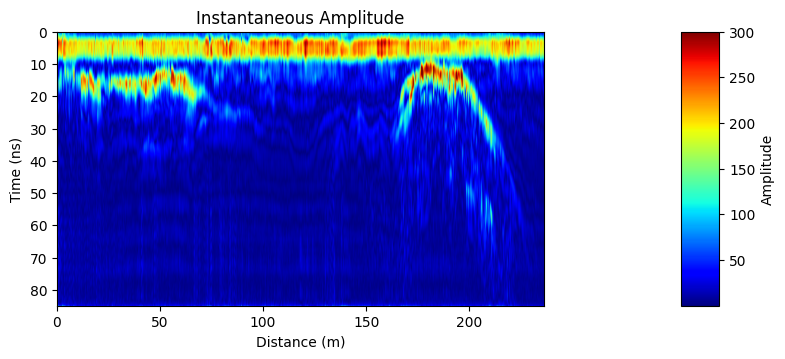

In [ ]:
arr = rg.calc_instantaneous_amplitude()
arr = np.clip(arr, 0, 300)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.title("Instantaneous Amplitude")
plt.xlabel("Distance (m)")
plt.ylabel("Time (ns)")
im = plt.imshow(arr, cmap="jet", aspect=ratio, extent=[x.min(), x.max(), t.max(), t.min()])
cx = fig.add_axes([0.9, 0.1, 0.02, 0.8])  # Colorbar axis
fig.colorbar(im, cax=cx, label="Amplitude")
#plt.tight_layout()
plt.savefig(fname="feature_plots/instantaneous_amplitude.png", dpi=300) if save else None
plt.show()

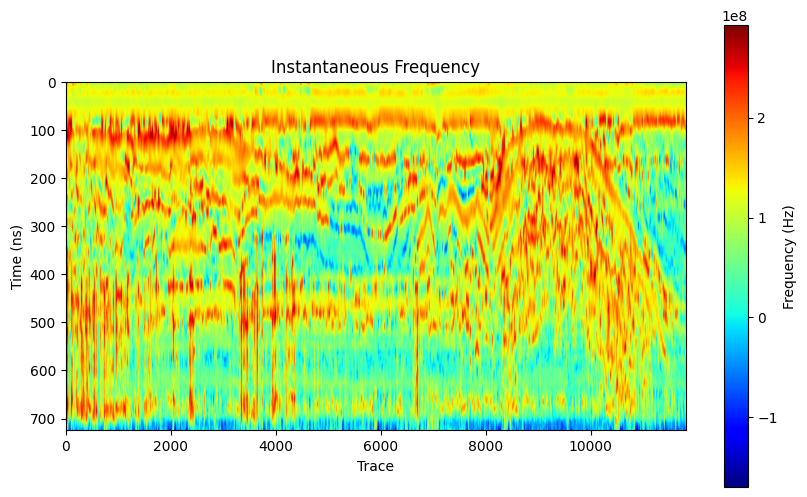

In [ ]:
arr = rg.calc_instantaneous_frequency()
arr = np.clip(arr, -3e8, 3e8)
arr = rg.calc_mean(arr, x_dis=10, y_dis=10)

plt.figure(figsize=(10, 6))
plt.title("Instantaneous Frequency")
plt.xlabel("Trace")
plt.ylabel("Time (ns)")
plt.imshow(arr, cmap="jet", aspect=ratio)
plt.colorbar(label="Frequency (Hz)")
plt.show()

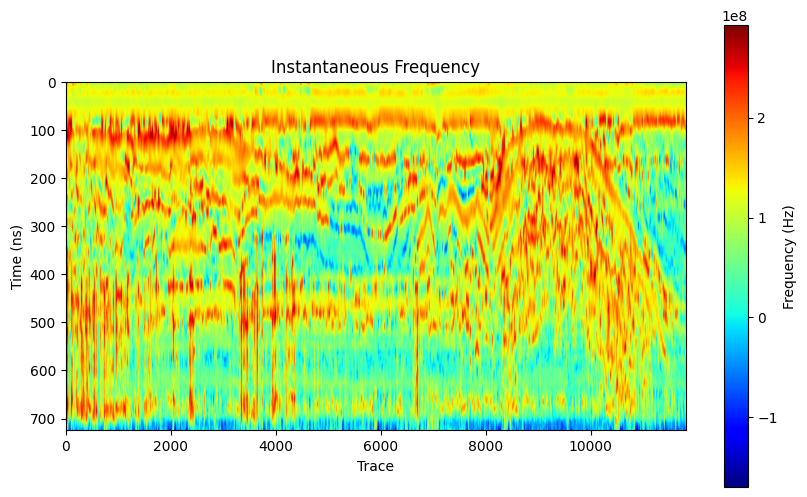

In [ ]:
arr = rg.calc_instantaneous_frequency()
arr = np.clip(arr, -3e8, 3e8)
arr = rg.calc_mean(arr, x_dis=10, y_dis=10)

plt.figure(figsize=(10, 6))
plt.title("Instantaneous Frequency")
plt.xlabel("Trace")
plt.ylabel("Time (ns)")
plt.imshow(arr, cmap="jet", aspect=ratio)
plt.colorbar(label="Frequency (Hz)")
plt.show()